<a href="https://colab.research.google.com/github/VishalSingh1703/ML-Practice/blob/main/ANN_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
 # import lib

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-47-fcb30efeffae>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


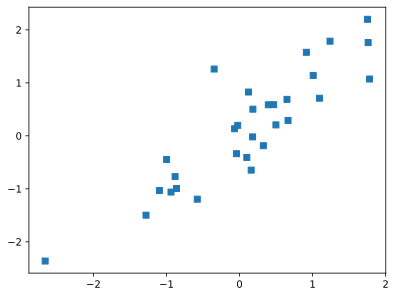

In [48]:
# create data

N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)/2

# plot
plt.plot(x, y, 's')
plt.show()

In [49]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1), # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1, 1)  # ouput layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [50]:
# learning rate
learningRate = 0.05

# loss function
lossfun = nn.MSELoss()

#optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [51]:
# Train the model
numepochs = 300
losses = torch.zeros(numepochs)

# Train
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat, y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

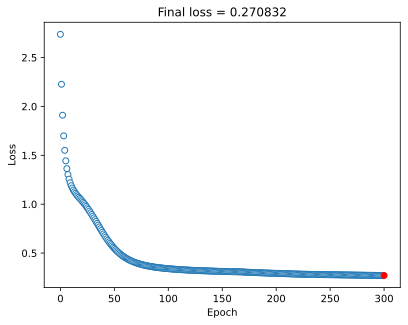

In [52]:
# show the losses
# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss(MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = .1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [53]:
testloss.detach()

tensor(0.2708)

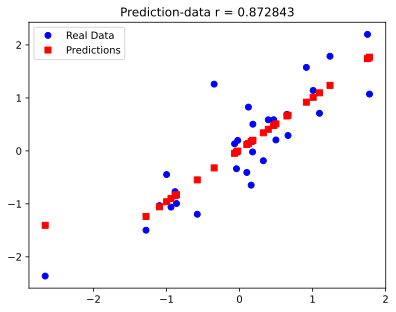

In [54]:
# plot the data
plt.plot(x, y, 'bo', label = 'Real Data')
plt.plot(x, predictions.detach(), 'rs', label = 'Predictions')
plt.title(f'Prediction-data r = {np.corrcoef(y.T,predictions.detach().T)[0,1]:2f}')
plt.legend()
plt.show()